In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [119]:
data = pd.read_csv('db/gym_members.csv')
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [121]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [122]:
data['Age'].dtypes

dtype('int64')

In [123]:
columns_categoricas = [col for col in data.columns if data[col].dtypes == 'object']
columns_categoricas

columns_numericas = [col for col in data.columns if data[col].dtypes != 'object']
columns_numericas

['Age',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

########################################
ANALISIS DE DATOS CONTINUOS
########################################

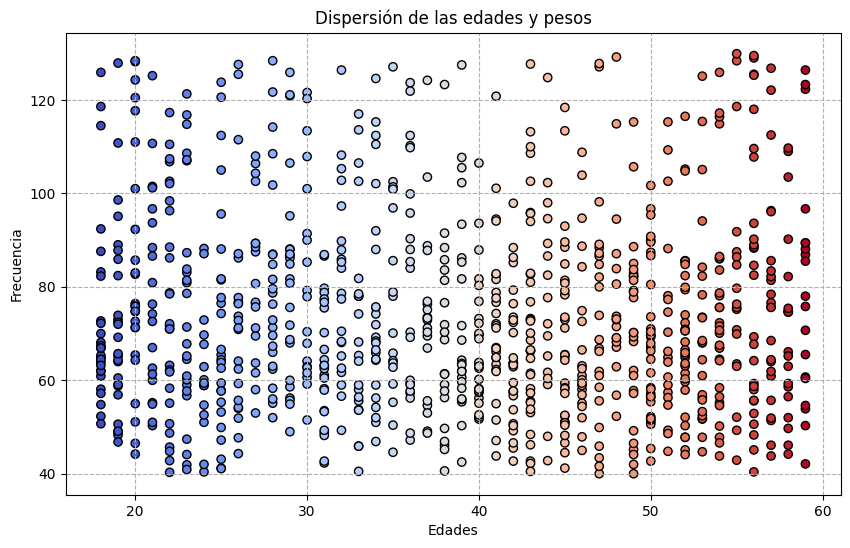

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Weight (kg)'], edgecolor='black', c=data['Age'], cmap='coolwarm', )
plt.title('Dispersión de las edades y pesos')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--')
plt.show()

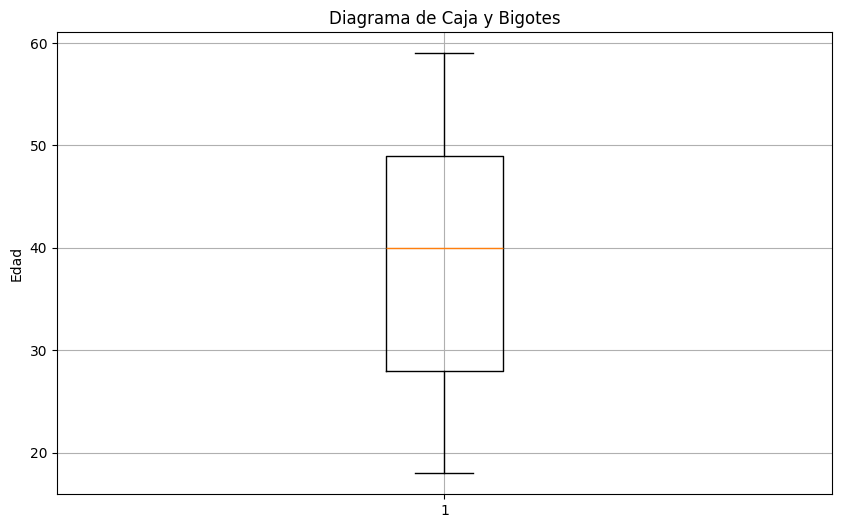

In [125]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Age'])
plt.title('Diagrama de Caja y Bigotes')
plt.ylabel('Edad')
plt.grid()
plt.show()

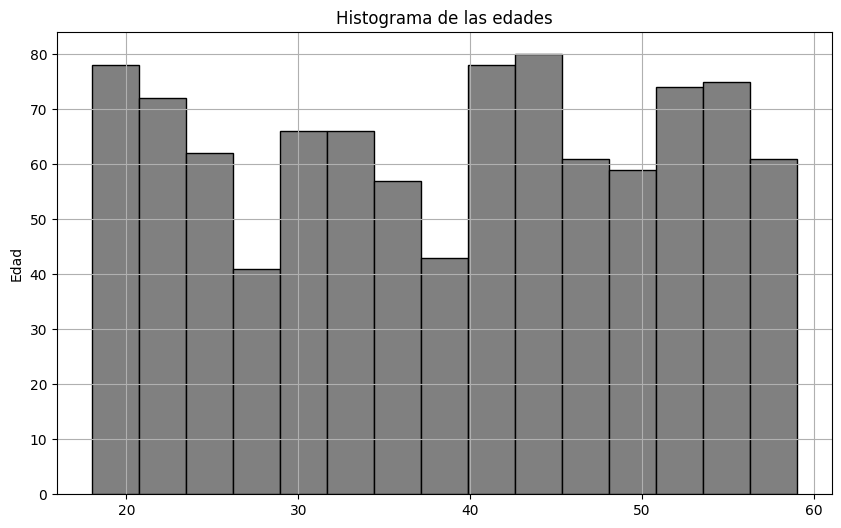

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=15, edgecolor='black', color='grey')
plt.title('Histograma de las edades')
plt.ylabel('Edad')
plt.grid()
plt.show()

In [127]:
c = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 92.5, 95, 97.5, 99, 100]
matrix = pd.concat([pd.DataFrame(c), pd.DataFrame(np.percentile(data['Age'].dropna(), c))], axis=1)
matrix.columns = ["Cuantil", "Valor_Variable"]
matrix.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,18.0,18.0,19.0,21.2,26.0,30.0,35.0,40.0,43.0,47.0,51.0,55.0,56.0,57.0,58.0,59.0,59.0


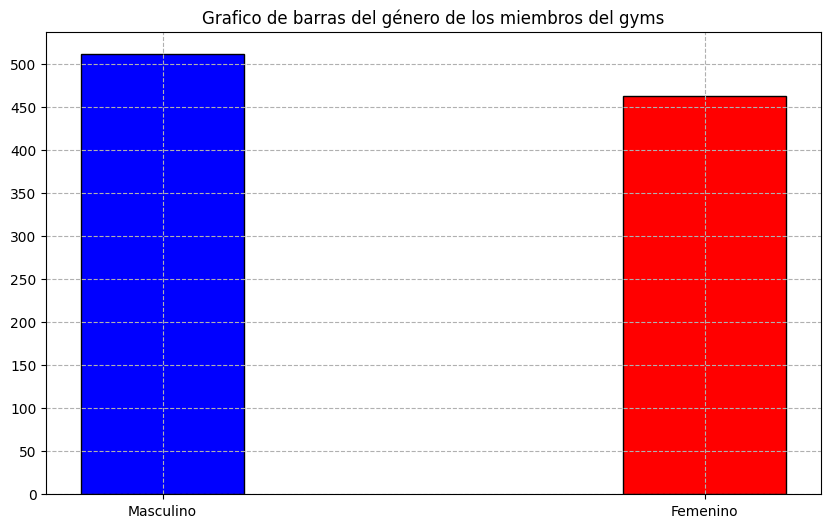

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(['Masculino', 'Femenino'], data['Gender'].value_counts(), color=['blue', 'red'], edgecolor='black', width=0.3)
plt.yticks(range(0, data['Gender'].value_counts().max(), 50))
plt.title('Grafico de barras del género de los miembros del gyms')
plt.grid(True, linestyle='--')
plt.show()